In [1]:
# Import the libraries we need to use in this lab
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
cerdit_d = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\data files\Machine Learning Data\default of credit card clients.csv")
cerdit_d.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
cerdit_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ID         30000 non-null  int64
 1   LIMIT_BAL  30000 non-null  int64
 2   SEX        30000 non-null  int64
 3   EDUCATION  30000 non-null  int64
 4   MARRIAGE   30000 non-null  int64
 5   AGE        30000 non-null  int64
 6   PAY_1      30000 non-null  int64
 7   PAY_2      30000 non-null  int64
 8   PAY_3      30000 non-null  int64
 9   PAY_4      30000 non-null  int64
 10  PAY_5      30000 non-null  int64
 11  PAY_6      30000 non-null  int64
 12  BILL_AMT1  30000 non-null  int64
 13  BILL_AMT2  30000 non-null  int64
 14  BILL_AMT3  30000 non-null  int64
 15  BILL_AMT4  30000 non-null  int64
 16  BILL_AMT5  30000 non-null  int64
 17  BILL_AMT6  30000 non-null  int64
 18  PAY_AMT1   30000 non-null  int64
 19  PAY_AMT2   30000 non-null  int64
 20  PAY_AMT3   30000 non-null  int64
 21  PAY_AMT4   3

In [4]:
cerdit_d['dpnm'].value_counts()


0    23364
1     6636
Name: dpnm, dtype: int64

**Data Inflation to simulate a real world finance dataset**

In [5]:
n_replicas = 10

# inflate the original dataset
big_cerdit_data = pd.DataFrame(np.repeat(cerdit_d.values, n_replicas, axis=0), columns=cerdit_d.columns)

print("There are " + str(len(big_cerdit_data)) + " observations in the inflated credit card dataset.")
print("There are " + str(len(big_cerdit_data.columns)) + " variables in the dataset.")

# display first rows in the new dataset
big_cerdit_data.head()

There are 300000 observations in the inflated credit card dataset.
There are 25 variables in the dataset.


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,dpnm
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
3,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
4,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1


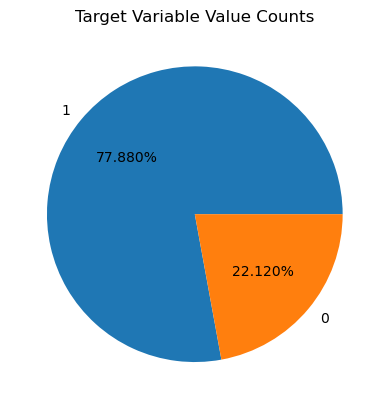

In [6]:
# get the set of distinct lables
labels = big_cerdit_data.dpnm.unique()

# get the count of each target variable
sizes = big_cerdit_data.dpnm.value_counts().values

# plot the target variables value counts
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

There is imbalance between the target variable

**Data Preprocessing**

In [7]:
big_cerdit_data.iloc[:, 1:24] = StandardScaler().fit_transform(big_cerdit_data.iloc[:, 1:24])
data_matrix = big_cerdit_data.values

# X: feature matrix (for this analysis, we exclude the ID variable from the dataset)
X = data_matrix[:, 1:24]

# y: labels vector
y = data_matrix[:, 24]

# data normalization
X = normalize(X, norm="l1")

# print the shape of the features matrix and the labels vector
print('X.shape=', X.shape, 'y.shape=', y.shape)

X.shape= (300000, 23) y.shape= (300000,)


Dataset Train and test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (210000, 23) Y_train.shape= (210000,)
X_test.shape= (90000, 23) Y_test.shape= (90000,)


**Decision Tree**

In [9]:
# compute the sample weights to be used as input to the train routine so that 
# it takes into account the class imbalance present in this dataset
w_train = compute_sample_weight('balanced', y_train)

# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function calls, set random_state to a given integer value
cerdit_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

# train a Decision Tree Classifier using scikit-learn
t0 = time.time()
cerdit_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time()-t0
print("[Scikit-Learn] Training time (s):  {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  3.98880


In [10]:
cerdit_pred = cerdit_dt.predict_proba(X_test)[:,1]

In [11]:
print (cerdit_pred [0:5])
print (y_test [0:5])

[0.29375557 0.29375557 0.44142085 0.71802787 0.44142085]
[1. 0. 0. 1. 1.]


In [13]:
sklearn_roc_auc = roc_auc_score(y_test, cerdit_pred)
print('[Scikit-Learn] ROC-AUC score : {0:.3f}'.format(sklearn_roc_auc))

[Scikit-Learn] ROC-AUC score : 0.757


**SVM Model**

In [14]:
from sklearn.svm import LinearSVC

cerdit_svm = LinearSVC(class_weight='balanced', random_state=31, loss="hinge", fit_intercept=False)

# train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
cerdit_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  1.62


In [15]:
cerdit_pred = cerdit_svm.decision_function(X_test)

In [16]:
print (cerdit_pred [0:5])
print (y_test [0:5])

[-0.55438112 -0.46315645  0.93062876  1.26357941  0.59186995]
[1. 0. 0. 1. 1.]


In [18]:
# evaluate accuracy on test set
acc_sklearn  = roc_auc_score(y_test, cerdit_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

[Scikit-Learn] ROC-AUC score:   0.714


In [ ]:
#from sklearn